## Word embeddings for IMDB data
    + Here we train our own embeddings
    
    - We load the data
    - Preprocess it
    - Train it
    


In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Basic imports

In [12]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, Dense, Flatten

### Load the dataset

In [3]:
vocab_size = 10000 # we take 10K most comon word 

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
print(X_train.shape)
print(len(X_train[0]))
print(y_train.shape)
print(y_train[0])

(25000,)
218
(25000,)
1


In [6]:
print(X_test.shape)
print(len(X_test[0]))
print(y_test.shape)
print(y_test[0])

(25000,)
68
(25000,)
0


### Preprocess data

In [7]:
max_len = 20

In [8]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [9]:
set(y_train)

{0, 1}

In [10]:
print(X_train.shape)
print(len(X_train[0]))

print(X_test.shape)
print(len(X_test[0]))

(25000, 20)
20
(25000, 20)
20


### Model

In [22]:
model = Sequential()

model.add(Embedding(vocab_size, 8, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [45]:
print(model.layers[0].input_shape)
print(model.layers[0].output_shape)

print(model.layers[1].input_shape)
print(model.layers[1].output_shape)

print(model.layers[2].input_shape)
print(model.layers[2].output_shape)

(None, 20)
(None, 20, 8)
(None, 20, 8)
(None, 160)
(None, 160)
(None, 1)


In [24]:
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

### Train

In [25]:
num_of_epochs = 10
history = model.fit(X_train, y_train, epochs=num_of_epochs, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 282us/step - loss: 0.6488 - acc: 0.6489 - val_loss: 0.5626 - val_acc: 0.7228
Epoch 2/10
20000/20000 [==============================] - 5s 271us/step - loss: 0.4761 - acc: 0.7868 - val_loss: 0.4961 - val_acc: 0.7446
Epoch 3/10
20000/20000 [==============================] - 6s 290us/step - loss: 0.3838 - acc: 0.8394 - val_loss: 0.4901 - val_acc: 0.7564
Epoch 4/10
20000/20000 [==============================] - 5s 246us/step - loss: 0.3197 - acc: 0.8760 - val_loss: 0.4968 - val_acc: 0.7508
Epoch 5/10
20000/20000 [==============================] - 5s 242us/step - loss: 0.2654 - acc: 0.9024 - val_loss: 0.5155 - val_acc: 0.7478
Epoch 6/10
20000/20000 [==============================] - 5s 271us/step - loss: 0.2189 - acc: 0.9280 - val_loss: 0.5388 - val_acc: 0.7452
Epoch 7/10
20000/20000 [==============================] - 5s 245us/step - loss: 0.1791 - acc: 0.9466 - val_loss: 0.5681 - v

### Plots

In [27]:
from matplotlib import pyplot as plt

In [32]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

no_of_points = range(1, len(train_acc)+1)

In [37]:
#plt.plot(no_of_points, train_acc, 'bo', label='train_acc')
#plt.plot(no_of_points, val_acc, 'r+', label='val_acc')

#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')

#plt.legend()
#plt.show()

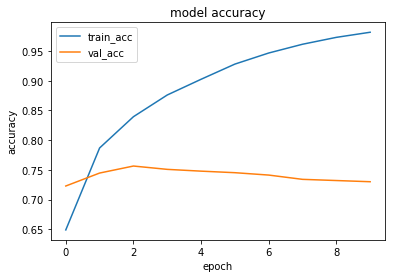

In [38]:
plt.plot(train_acc)
plt.plot(val_acc)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')

plt.show()

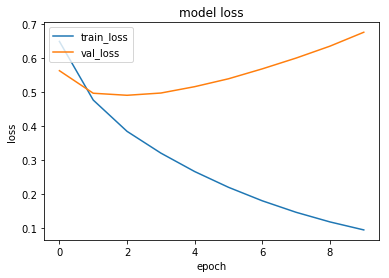

In [39]:
plt.plot(train_loss)
plt.plot(val_loss)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')

plt.show()